<a href="https://colab.research.google.com/github/debora28/pi-2020.2/blob/main/DataScience2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELO DE PREDIÇÃO DE CRIME DE ROUBO OU FURTO CONSIDERANDO DETERMINADOS PADRÕES
*O presente modelo tem como base o dataset publicado no Kaggle (https://www.kaggle.com/inquisitivecrow/crime-data-in-brazil) que contém uma coletânea de registros de boletins de ocorrência do estado de São Paulo no período de 2007 a 2016, oriundos do Sistema de Registro Digital de Ocorrências (R.D.O. em www.ssp.sp.gov.br). Os dados foram distribuídos em 21 tabelas, sendo alvo deste estudo apenas a tabela BO_2014_1 referente ao primeiro semestre do ano de 2014. A tabela original continha 954.113 registros de BO's, entretanto, apenas os 10.000 primeiros foram utilizados por motivos de desempenho computacional e por se tratar de um trabalho acadêmico. Os padrões observados para este modelo foram o horário da ocorrência, identificação da delegacia, cidade, idade da pessoa, meio de transporte (aqui chamado de 'conduta'), sexo e profissão, que já constam no dataset e foram considerados relevantes para a classificação.*

**Equipe**: 

Débora Caldas, Renan Urbano, Matheus Guerra, Horlando Leão, Héber Teófilo, Pablo Danillo, Rodrigo Vilemen.

**Siglas e termos:**

*DECAP = Departamento de Polícia Judiciária da Capital;

Descrição das colunas
* NUM_BO - Identificação numérica do BO,
* ANO_BO - Ano de registro do BO,
* ID_DELEGACIA - Identificação numérica da delegacia,
* NOME_DEPARTAMENTO,
* NOME_SECCIONAL,
* DELEGACIA - Nome da delegacia,
* NOME_DEPARTAMENTO_CIRC,
* NOME_SECCIONAL_CIRC,
* NOME_DELEGACIA_CIRC,
* ANO - Ano da ocorrência,
* MES - Mês da ocorrência,
* DATA_OCORRENCIA_BO - Data da ocorrência,
* HORA_OCORRENCIA_BO - Hora da ocorrência,
* FLAG_STATUS - Status da ocorrência,
* RUBRICA - Natureza jurídica da ocorrência especificada pelo tipo de crime,
* DESDOBRAMENTO - Detalhamento,
* CONDUTA - Transporte, condução,
* LATITUDE - Coordenadas da ocorrência,
* LONGITUDE - Coordenadas da ocorrência,
* CIDADE - Localização da ocorrência,
* LOGRADOURO - Localização da ocorrência,
* NUMERO_LOGRADOURO - Localização da ocorrência,
* FLAG_STATUS.1 - Status da ocorrência,
* DESCR_TIPO_PESSOA - Qualificação da pessoa envolvida na ocorrência,
* CONT_PESSOA - Contagem de pessoas envolvidas na ocorrência,
* SEXO_PESSOA - Sexo da pessoa envolvida,
* IDADE_PESSOA - Idade da pessoa envolvida,
* COR - Cor da pele da pessoa envolvida,
* DESCR_PROFISSAO - Descrição da profissão da pessoa envolvida,
* DESCR_GRAU_INSTRUCAO - Descrição do grau de instrução da pessoa envolvida,


#**1. Imports e upload**

*Importando bibliotecas necessárias:*

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

*Carregando o arquivo csv do GitHub:*

In [216]:
url = 'https://raw.githubusercontent.com/debora28/pi-2020.2/main/2014-1-10mil.csv'
data = pd.read_csv(url)

#**2. Conhecendo os dados**


*Visão geral da tabela:*



*É formada por 31 colunas, das quais a maior parte é composta por dados qualitativos, organizados como objetos do tipo String:*

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   NUM_BO                  10000 non-null  int64  
 2   ANO_BO                  10000 non-null  int64  
 3   ID_DELEGACIA            10000 non-null  int64  
 4   NOME_DEPARTAMENTO       10000 non-null  object 
 5   NOME_SECCIONAL          10000 non-null  object 
 6   DELEGACIA               10000 non-null  object 
 7   NOME_DEPARTAMENTO_CIRC  10000 non-null  object 
 8   NOME_SECCIONAL_CIRC     10000 non-null  object 
 9   NOME_DELEGACIA_CIRC     10000 non-null  object 
 10  ANO                     10000 non-null  int64  
 11  MES                     10000 non-null  int64  
 12  DATA_OCORRENCIA_BO      9913 non-null   object 
 13  HORA_OCORRENCIA_BO      8960 non-null   object 
 14  FLAG_STATUS             10000 non-null 

*Verificamos que as colunas Unnamed: 0 (um índice numérico sem lógica sequencial), Nome_Departamento, Nome_Seccional, Delegacia, Nome_Departamento_Circ, Nome_Seccional_Circ, Nome_Delegacia_Circ, Flag_Status, Desdobramento, Numero_Logradouro, Flag_Status.1 não seriam relevantes nesse contexto, portanto foram removidas:*

In [132]:
data.head()

,Unnamed: 0,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,FLAG_STATUS,RUBRICA,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
0,243,2,2014,280401,DEMACRO,DEL.SEC.CARAPICUIBA,DISE- DEL.SEC.CARAPICUIBA,DEMACRO,DEL.SEC.CARAPICUIBA,01 D.P. BARUERI,2014,2,26/02/2014,17:00,C,Drogas,NaN,NaN,NaN,NaN,BARUERI,R MARIA HELENA,NaN,C,Curador,7,F,51.0,Parda,AUXILIAR DE LIMPEZA,NaN
1,244,2,2014,280401,DEMACRO,DEL.SEC.CARAPICUIBA,DISE- DEL.SEC.CARAPICUIBA,DEMACRO,DEL.SEC.CARAPICUIBA,01 D.P. BARUERI,2014,2,26/02/2014,17:00,C,Drogas,NaN,NaN,NaN,NaN,BARUERI,R MARIA HELENA,NaN,C,Indiciado,4,M,19.0,Parda,DESEMPREGADO,1 Grau completo
2,245,2,2014,280401,DEMACRO,DEL.SEC.CARAPICUIBA,DISE- DEL.SEC.CARAPICUIBA,DEMACRO,DEL.SEC.CARAPICUIBA,01 D.P. BARUERI,2014,2,26/02/2014,17:00,C,Drogas,NaN,NaN,NaN,NaN,BARUERI,R MARIA HELENA,NaN,C,Testemunha,2,M,38.0,NaN,INVESTIGADOR(A),Superior completo
3,246,2,2014,280401,DEMACRO,DEL.SEC.CARAPICUIBA,DISE- DEL.SEC.CARAPICUIBA,DEMACRO,DEL.SEC.CARAPICUIBA,01 D.P. BARUERI,2014,2,26/02/2014,17:00,C,Drogas,NaN,NaN,NaN,NaN,BARUERI,R MARIA HELENA,NaN,C,Testemunha,6,M,23.0,Parda,DESEMPREGADO,2 Grau completo
4,270,3,2014,30314,DEMACRO,DEL.SEC.MOGI DAS CRUZES,DISE- DEL.SEC.MOGI DAS CRUZES,DEMACRO,DEL.SEC.MOGI DAS CRUZES,DEL.POL.ITAQUAQUECETUBA,2014,1,14/01/2014,17:00,C,Drogas,NaN,NaN,-2.348.960.369,-4.637.155.072,ITAQUAQUECETUBA,R UBATUBA,162.0,C,Testemunha,1,M,40.0,NaN,POLICIAL CIVIL,2 Grau completo


In [133]:
data = data.drop(columns=['Unnamed: 0', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'DELEGACIA', 'NOME_DEPARTAMENTO_CIRC', 'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'FLAG_STATUS', 'DESDOBRAMENTO', 'NUMERO_LOGRADOURO', 'FLAG_STATUS.1'], axis=1)
data.head(0)

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO


*A tabela atual possui 10.000 linhas (1,05% do total original de 954.113 linhas) e 20 colunas (já que 11 foram removidas anteriormente):*

In [134]:
data.shape

(10000, 20)

#**3. Limpando e tratando os dados**

*É necessário remover campos nulos (NA - Not Available e NaN - Not a Number) na tabela ou preenchê-los para aumentar a qualidade dos dados, portanto, o próximo passo é procurar quais colunas possuem campos Na ou NaN (True):*

In [135]:
data.isnull().any()

NUM_BO                  False
ANO_BO                  False
ID_DELEGACIA            False
ANO                     False
MES                     False
DATA_OCORRENCIA_BO       True
HORA_OCORRENCIA_BO       True
RUBRICA                 False
CONDUTA                  True
LATITUDE                 True
LONGITUDE                True
CIDADE                  False
LOGRADOURO               True
DESCR_TIPO_PESSOA       False
CONT_PESSOA             False
SEXO_PESSOA             False
IDADE_PESSOA             True
COR                      True
DESCR_PROFISSAO          True
DESCR_GRAU_INSTRUCAO     True
dtype: bool

*Então, é preciso quantificar esses campos nulos para se ter uma ideia de quais colunas são mais críticas ou passíveis de serem removidas por insuficiência de dados:*

In [136]:
print(data.isnull().sum())

NUM_BO                     0
ANO_BO                     0
ID_DELEGACIA               0
ANO                        0
MES                        0
DATA_OCORRENCIA_BO        87
HORA_OCORRENCIA_BO      1040
RUBRICA                    0
CONDUTA                 4835
LATITUDE                1593
LONGITUDE               1593
CIDADE                     0
LOGRADOURO               429
DESCR_TIPO_PESSOA          0
CONT_PESSOA                0
SEXO_PESSOA                0
IDADE_PESSOA            1902
COR                     2372
DESCR_PROFISSAO         3002
DESCR_GRAU_INSTRUCAO    2832
dtype: int64


In [137]:
data.isnull().sum().sum()

19685

*Podemos ver que há 19.685 campos vazios na tabela distribuídos em 10 colunas.*

*Assim, devendo ser preenchidos:*

*Avaliamos que seria melhor completá-los com os valores mais frequentes de cada coluna. No caso da coluna CONDUTA, a palavra 'Veículo' ocorreu com mais frequência, ou seja, a maioria dos envolvidos estava com um veículo no momento da ocorrência, então essa será usada para preencher os campos vazios.*

In [138]:
data['CONDUTA'].value_counts()

VEICULO                         1386
TRANSEUNTE                      1369
OUTROS                           681
RESIDENCIA                       422
INTERIOR DE VEICULO              354
ESTABELECIMENTO COMERCIAL        326
CARGA                            273
INTERIOR ESTABELECIMENTO         112
ESTABELECIMENTO BANCARIO          75
ESTABELECIMENTO-OUTROS            62
INTERIOR TRANSPORTE COLETIVO      46
ESTABELECIMENTO ENSINO            37
COLETIVO                          13
CONDOMINIO RESIDENCIAL             7
CONDOMINIO COMERCIAL               2
Name: CONDUTA, dtype: int64

In [139]:
data['CONDUTA'].fillna('VEICULO', inplace=True)

*O mesmo foi feito com as demais colunas:
Na coluna LATITUDE, o valor '-23.71286115' é o mais indicado para preencher os campos.*

In [140]:
x = data['LATITUDE'].mode()
data['LATITUDE'].fillna('-23.71286115', inplace=True)

In [141]:
data['LATITUDE'].isnull().sum()

0

*E na coluna LONGITUDE, o valor '-46.78186771' é o mais indicado.*

In [142]:
data['LONGITUDE'].value_counts()

-4.678.186.771    48
-4.681.568.811    23
-4.639.605.905    23
-4.661.519.738    22
-4.672.128.418    22
                  ..
-4.675.717.635     1
-4.651.358.385     1
-4.629.302.629     1
-4.641.232.786     1
-4.665.420.856     1
Name: LONGITUDE, Length: 3439, dtype: int64

In [143]:
data['LONGITUDE'].fillna('-46.78186771', inplace=True)

In [144]:
data['LONGITUDE'].isnull().sum()

0

*De igual modo, '01/01/2014' é a data que mais aparece:*

In [145]:
data['DATA_OCORRENCIA_BO'].value_counts()

01/01/2014    2556
02/01/2014    1443
03/01/2014     911
06/01/2014     550
04/01/2014     415
              ... 
21/04/2014       1
09/06/2014       1
23/05/2014       1
15/02/2014       1
29/05/2014       1
Name: DATA_OCORRENCIA_BO, Length: 155, dtype: int64

In [146]:
data['DATA_OCORRENCIA_BO'].fillna('01/01/2014', inplace=True)

In [147]:
data['DATA_OCORRENCIA_BO'].isnull().sum()

0

*Bem como o horário '12:00':*

In [148]:
data['HORA_OCORRENCIA_BO'].value_counts()

12:00    239
15:00    218
16:00    207
14:00    204
01:00    201
        ... 
07:17      1
07:11      1
05:42      1
02:39      1
07:27      1
Name: HORA_OCORRENCIA_BO, Length: 484, dtype: int64

In [226]:
data['HORA_OCORRENCIA_BO'].fillna('12:00', inplace=True)

In [227]:
data['HORA_OCORRENCIA_BO'].isnull().sum()

0

*A Avenida Sapopemba é o logradouro mais citado:*




In [151]:
data['LOGRADOURO'].value_counts()

AV SAPOPEMBA               65
EST DO M BOI MIRIM         54
AV DO ESTADO               39
R APA                      35
AV CELSO GARCIA            34
                           ..
R PADRE CALDAS BARBOSA      1
AV DAMIAO L VASCONCELOS     1
PC JULIO PRESTES            1
R PIRENOPOLIS               1
RUA CAMANDACAIA             1
Name: LOGRADOURO, Length: 3186, dtype: int64

In [152]:
data['LOGRADOURO'].fillna('AV SAPOPEMBA', inplace=True)

*E a cor da pele da maioria das pessoas envolvidas é branca, seguida da cor parda:*

In [153]:
data['COR'].value_counts()

Branca     4166
Parda      2517
Preta       575
Outros      334
Amarela      36
Name: COR, dtype: int64

In [154]:
data['COR'].fillna('Branca', inplace=True)

*Foi verificado também que a idade média (51 anos) não refletia a realidade, já que foi elevada pela ocorrência atípica de pessoa com 100 anos, estando a maioria entre 26 e 38 anos. Portanto, a idade usada para preencher os espaços, em lugar de usar a média, foi de 30 anos que foi a mais frequente, apesar de haver outros registros com quantidades bem próximas:*

In [155]:
data['IDADE_PESSOA'].mean

<bound method Series.mean of 0       51.0
1       19.0
2       38.0
3       23.0
4       40.0
        ... 
9995    35.0
9996    29.0
9997    41.0
9998    46.0
9999    26.0
Name: IDADE_PESSOA, Length: 10000, dtype: float64>

In [156]:
data['IDADE_PESSOA'].value_counts()

30.0     269
26.0     260
33.0     256
28.0     245
38.0     241
        ... 
103.0      1
87.0       1
91.0       1
89.0       1
88.0       1
Name: IDADE_PESSOA, Length: 92, dtype: int64

In [157]:
data['IDADE_PESSOA'].fillna('30', inplace=True)

*A profissão que mais apareceu nos BOs foi a de policial (militar e civil), talvez em decorrência da periculosidade típica do ofício:*

In [158]:
data['DESCR_PROFISSAO'].value_counts()

POLICIAL MILITAR           827
POLICIAL CIVIL             721
ESTUDANTE                  308
MOTORISTA                  300
DESEMPREGADO               281
                          ... 
FLORISTA                     1
VIGILANTE NOTURNO            1
INVESTIGADOR PARTICULAR      1
MECANICO(A) DE PRECISAO      1
PEDAGOGO                     1
Name: DESCR_PROFISSAO, Length: 417, dtype: int64

In [159]:
data['DESCR_PROFISSAO'].fillna('POLICIAL MILITAR', inplace=True)

*E, por fim, verificamos que a maioria tem o segundo grau completo:*

In [160]:
data['DESCR_GRAU_INSTRUCAO'].value_counts()

2 Grau completo        2780
1 Grau completo        1882
Superior completo      1310
1 Grau incompleto       574
Superior incompleto     321
2 Grau incompleto       227
Analfabeto               74
Name: DESCR_GRAU_INSTRUCAO, dtype: int64

In [161]:
data['DESCR_GRAU_INSTRUCAO'].fillna('2 Grau completo', inplace=True)

*Agora conferimos que os campos estão totalmente preenchidos, então a pesquisa por nulos retorna False:*

In [162]:
print(data.isnull().any())

NUM_BO                  False
ANO_BO                  False
ID_DELEGACIA            False
ANO                     False
MES                     False
DATA_OCORRENCIA_BO      False
HORA_OCORRENCIA_BO      False
RUBRICA                 False
CONDUTA                 False
LATITUDE                False
LONGITUDE               False
CIDADE                  False
LOGRADOURO              False
DESCR_TIPO_PESSOA       False
CONT_PESSOA             False
SEXO_PESSOA             False
IDADE_PESSOA            False
COR                     False
DESCR_PROFISSAO         False
DESCR_GRAU_INSTRUCAO    False
dtype: bool


*Aparentemente, as colunas não guardam nenhuma correlação entre si, de acordo com a matriz de correlação abaixo, na qual nenhum coeficiente ultrapassa 0.5, o que pode significar que não há influência em comum entre elas: 
(Obs.: As colunas ANO_BO e ANO foram abstraídas)*

In [163]:
df = data.drop(columns=['ANO_BO', 'ANO'], axis=1)

In [164]:
corr = df.corr()
corr

,NUM_BO,ID_DELEGACIA,MES,CONT_PESSOA
NUM_BO,1.000000,-0.054977,0.183903,-0.077796
ID_DELEGACIA,-0.054977,1.000000,0.362619,0.115348
MES,0.183903,0.362619,1.000000,0.075964
CONT_PESSOA,-0.077796,0.115348,0.075964,1.000000


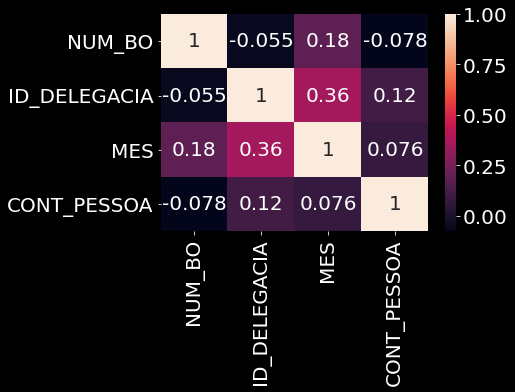

In [221]:
sns.heatmap(corr, annot=True)

#**3.1 Convertendo dados categóricos em numéricos**
*A fim de construir nosso modelo de predição, precisamos separar os dois tipos de crime de interesse, furto e roubo, da coluna alvo 'RUBRICA'. Como a coluna Rubrica é formada por valores não-numéricos (nomes dos tipos de crimes), é preciso executar a codificação one-hot, tranformando cada campo em uma nova coluna contendo apenas números:*



In [ ]:
novas_colunas = pd.get_dummies(data['RUBRICA']) 
data = pd.concat([data,novas_colunas], axis=1) 
data.head(2)

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO,Drogas,Estupro,Estupro de vulneravel,Furto,Furto qualificado,Homicidio,Homicidio culposo,Homicidio culposo por veiculo,Homicidio qualificado,Lesao corporal,Lesao corporal de natureza GRAVE,Lesao corporal seguida de morte,Lesao culposa por veiculo,Roubo
0,2,2014,280401,2014,2,26/02/2014,17:00,Drogas,VEICULO,-2371286115,-4678186771,BARUERI,R MARIA HELENA,Curador,7,F,51,Parda,AUXILIAR DE LIMPEZA,2 Grau completo,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2014,280401,2014,2,26/02/2014,17:00,Drogas,VEICULO,-2371286115,-4678186771,BARUERI,R MARIA HELENA,Indiciado,4,M,19,Parda,DESEMPREGADO,1 Grau completo,1,0,0,0,0,0,0,0,0,0,0,0,0,0


*A partir daí, podemos observar que o roubo é o crime mais comum e que o furto foi dividido em duas categorias (simples e qualificado).*

In [ ]:
data['RUBRICA'].value_counts()

Roubo                               3630
Lesao corporal                      1875
Drogas                              1694
Furto                               1012
Furto qualificado                    633
Lesao culposa por veiculo            595
Homicidio                            279
Estupro de vulneravel                103
Homicidio qualificado                 96
Estupro                               50
Homicidio culposo por veiculo         22
Lesao corporal seguida de morte        4
Lesao corporal de natureza GRAVE       4
Homicidio culposo                      3
Name: RUBRICA, dtype: int64

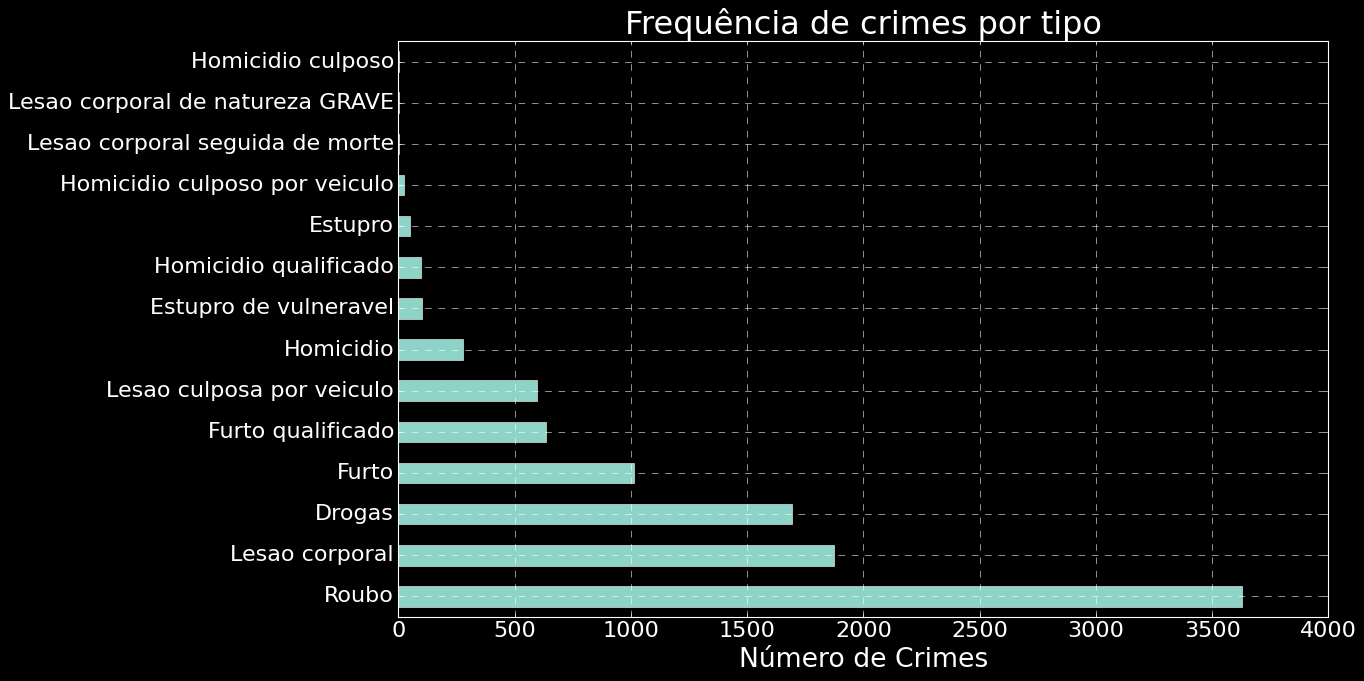

In [264]:
plt.style.use('dark_background')
plt.figure(figsize=(15,9))
plt.xlabel('Número de Crimes')
data['RUBRICA'].value_counts().plot(kind='barh', title='Frequência de crimes por tipo')
plt.rcParams.update({'font.size': 20})
plt.show()

*Para o nosso estudo, precisamos somar essas três colunas (Roubo, Furto e Furto qualificado) que estão relacionadas aos Crimes Violentos contra o Patrimônio (CVP). Então, criamos uma nova coluna (CRIME) com o somatório dos casos de furto e roubo, excluindo outros tipos de crimes:*

In [ ]:
data['CRIME'] = data['Roubo'] + data['Furto'] + data['Furto qualificado']
data.head(10)

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO,Drogas,Estupro,Estupro de vulneravel,Furto,Furto qualificado,Homicidio,Homicidio culposo,Homicidio culposo por veiculo,Homicidio qualificado,Lesao corporal,Lesao corporal de natureza GRAVE,Lesao corporal seguida de morte,Lesao culposa por veiculo,Roubo,CRIME
0,2,2014,280401,2014,2,26/02/2014,17:00,Drogas,VEICULO,-2371286115,-4678186771,BARUERI,R MARIA HELENA,Curador,7,F,51,Parda,AUXILIAR DE LIMPEZA,2 Grau completo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2014,280401,2014,2,26/02/2014,17:00,Drogas,VEICULO,-2371286115,-4678186771,BARUERI,R MARIA HELENA,Indiciado,4,M,19,Parda,DESEMPREGADO,1 Grau completo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2014,280401,2014,2,26/02/2014,17:00,Drogas,VEICULO,-2371286115,-4678186771,BARUERI,R MARIA HELENA,Testemunha,2,M,38,Branca,INVESTIGADOR(A),Superior completo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,2014,280401,2014,2,26/02/2014,17:00,Drogas,VEICULO,-2371286115,-4678186771,BARUERI,R MARIA HELENA,Testemunha,6,M,23,Parda,DESEMPREGADO,2 Grau completo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2014,30314,2014,1,14/01/2014,17:00,Drogas,VEICULO,-2348960369,-4637155072,ITAQUAQUECETUBA,R UBATUBA,Testemunha,1,M,40,Branca,POLICIAL CIVIL,2 Grau completo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,2014,210106,2014,1,06/01/2014,11:00,Drogas,VEICULO,-2371286115,-4678186771,S.PAULO,R APA,Adolescente infrator,3,M,17,Parda,DESEMPREGADO,1 Grau incompleto,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,2014,210106,2014,1,06/01/2014,11:00,Drogas,VEICULO,-2371286115,-4678186771,S.PAULO,R APA,Testemunha,2,M,56,Branca,POLICIAL CIVIL,2 Grau completo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2,2014,30641,2014,1,02/01/2014,16:10,Drogas,VEICULO,-2355277328,-4620240893,MOGI DAS CRUZES,AVENIDA PERU,Adolescente infrator,2,M,16,Parda,DESEMPREGADO,1 Grau completo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2,2014,210102,2014,1,08/01/2014,15:00,Drogas,VEICULO,-2361894605,-4650630594,S.PAULO,R BATISTA FERGUSIO,Adolescente infrator,1,M,17,Parda,DESEMPREGADO(A),1 Grau completo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2,2014,210102,2014,1,08/01/2014,15:00,Drogas,VEICULO,-2361894605,-4650630594,S.PAULO,R BATISTA FERGUSIO,Condutor,4,M,33,Branca,POLICIAL CIVIL,Superior completo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **4. Conclusões**

*Podemos concluir que em média pelo menos 50% dos boletins tinham apenas 2 envolvidos (vítima ou não) e que pelo menos 75% das ocorrências se concentram no mês de janeiro, ainda que os registros sejam de apenas metade do ano. Talvez por esse ser geralmente período de férias o que inclui maior movimentação de pessoas nas ruas e em espaços públicos:*

In [166]:
data.describe()

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,CONT_PESSOA
count,10000.000000,10000.0,10000.000000,10000.0,10000.000000,10000.000000
mean,24.377100,2014.0,76819.235900,2014.0,1.362000,2.625500
std,16.054192,0.0,110985.447337,0.0,0.898909,1.934276
min,1.000000,2014.0,10004.000000,2014.0,1.000000,1.000000
25%,11.000000,2014.0,10365.000000,2014.0,1.000000,1.000000
50%,21.000000,2014.0,30211.000000,2014.0,1.000000,2.000000
75%,37.000000,2014.0,140206.000000,2014.0,1.000000,3.000000
max,63.000000,2014.0,990900.000000,2014.0,6.000000,17.000000


*Inclusive, os envolvidos são em sua maioria homens. Fato este que talvez contenha alguma relação com o que foi apontado anteriormente (de que a maior parte dos crimes foi sofrido por policiais), considerando as estatísticas de que a área é majoritariamente masculina, apesar da mudança de contexto dos últimos anos:*

In [167]:
data.groupby(by='SEXO_PESSOA').size()

SEXO_PESSOA
F    2335
I     166
M    7499
dtype: int64

*Corroborando as conclusões anteriores, os dados mostram que 8.126 crimes aconteceram no mês de janeiro em valores absolutos, os quais representam 81,26% do total do semestre (10.000 ocorrências).*

In [168]:
data['MES'].value_counts()

1    8126
2     904
3     481
4     278
5     135
6      76
Name: MES, dtype: int64

In [169]:
data['MES'].value_counts().sum()

10000

In [267]:
mes = data["MES"]

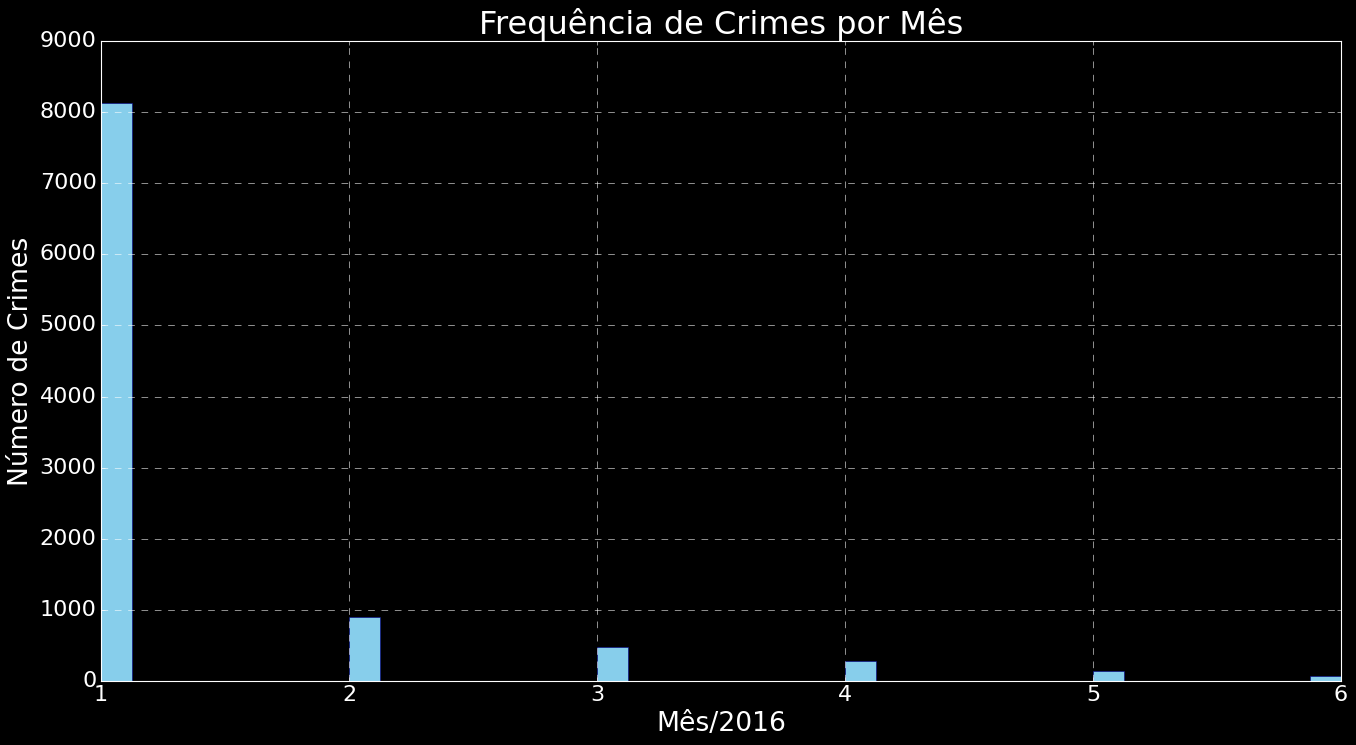

In [270]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(20,10))
plt.hist(mes, bins=40, color = "skyblue", ec="darkblue")
plt.title('Frequência de Crimes por Mês')
plt.ylabel('Número de Crimes')
plt.xlabel('Mês/2016')
plt.rcParams.update({'font.size': 20})
plt.show()

*E, claramente, vemos o pico de criminalidade ocorrer aproximadamente ao meio-dia:*

In [228]:
hora = data['HORA_OCORRENCIA_BO'].apply(lambda x: str(x)[:2])

In [243]:
hora = hora.astype(int)

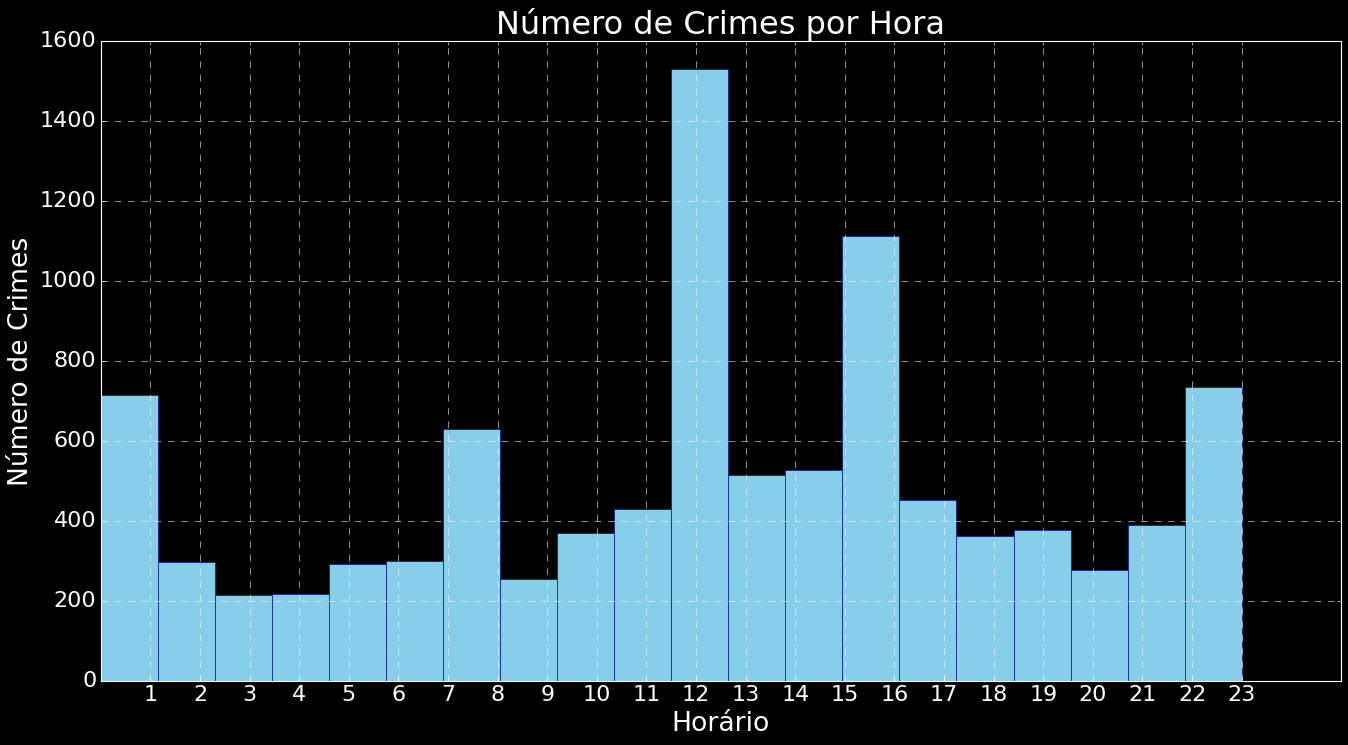

In [273]:
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.hist(hora, bins=20, color = "skyblue", ec="darkblue")
plt.title('Número de Crimes por Hora')
plt.ylabel('Número de Crimes')
plt.xlabel('Horário')
plt.xticks(range(1, 24))
plt.rcParams.update({'font.size': 20})
plt.show()

*Observamos também o quanto as ocorrências estão concentrados na capital, certamente devido à densidade populacional desta área:*

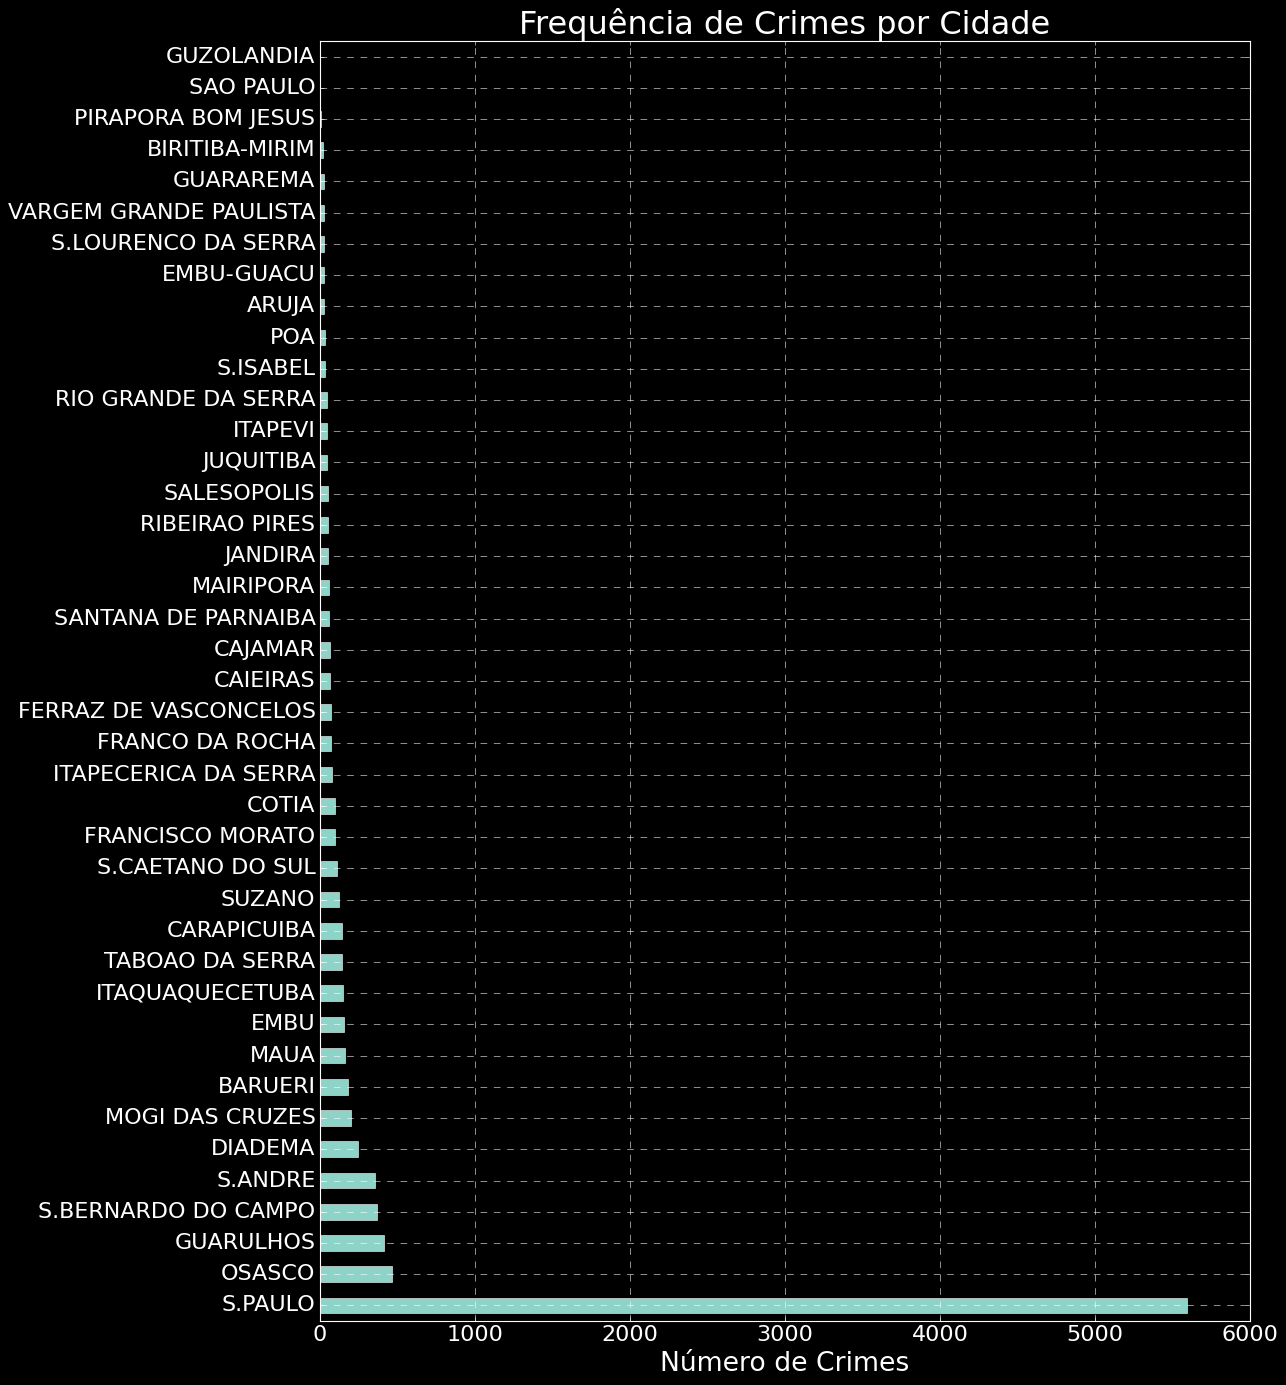

In [282]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 20))
plt.xlabel('Número de Crimes')
data['CIDADE'].value_counts().plot(kind='barh', title='Frequência de Crimes por Cidade')
plt.rcParams.update({'font.size': 20})
plt.show()

**Visualizando o mapa de calor para a ocorrência de crimes por região geográfica do estado de São Paulo.**

*Para construir o mapa, precisamos converter as coordenadas do tipo int para o tipo float:*

In [178]:
data['LATITUDE'] = data['LATITUDE'].str.replace('.', '')

In [180]:
# def insert_dot(string, index):
#   return string.insert(string + '.')

# data['LATITUDE'].apply(insert_dot())

In [181]:
data['LATITUDE'].head(20)

0     -2371286115
1     -2371286115
2     -2371286115
3     -2371286115
4     -2348960369
5     -2371286115
6     -2371286115
7     -2355277328
8     -2361894605
9     -2361894605
10    -2361894605
11    -2355277328
12    -2355277328
13    -2371286115
14     -235525928
15    -2348960369
16    -2348960369
17    -2355784394
18    -2330924825
19    -2330924825
Name: LATITUDE, dtype: object

In [275]:
data['LONGITUDE'].tail(10)

9990    -4.648.315.654
9991    -4.657.320.461
9992    -4.644.672.809
9993    -4.652.476.689
9994               NaN
9995    -4.681.859.162
9996    -4.681.859.162
9997    -4.677.055.823
9998    -4.666.987.176
9999    -4.675.421.897
Name: LONGITUDE, dtype: object

In [182]:
# data['LATITUDE'] = pd.to_numeric(data['LATITUDE'], errors='coerce')

In [183]:
# data['LONGITUDE'] = pd.to_numeric(data['LONGITUDE'], errors='coerce')

In [184]:
data['LONGITUDE'] = data['LONGITUDE'].str.replace('.', '')

In [185]:
data['LONGITUDE'].head(10)

0    -4678186771
1    -4678186771
2    -4678186771
3    -4678186771
4    -4637155072
5    -4678186771
6    -4678186771
7    -4620240893
8    -4650630594
9    -4650630594
Name: LONGITUDE, dtype: object

In [188]:
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-bbykc0m8
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-bbykc0m8
  Created wheel for folium: filename=folium-0.0.0-py2.py3-none-any.whl size=94730 sha256=eed58598b1599bcf571f27f6f5e643d7ea3064fb062688aa84aed5d20c76f020
  Stored in directory: /tmp/pip-ephem-wheel-cache-uitnhkix/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.0.0 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [189]:
import os
import folium
import pandas as pd
print(folium.__version__)

unknown


In [190]:
# from folium import plugins
# coordenadas = []
# lat = data['LATITUDE'][:10000].values
# long = data['LONGITUDE'][:10000].values

# mapa = folium.Map(location=[-23.542183, -46.640599],tiles='Stamen Toner',zoom_start=12)

# for la,lo in zip(lat,long):
#     coordenadas.append([la,lo])

# mapa.add_child(plugins.HeatMap(coordenadas))
# mapa

# **5. Preparando os dados para o modelo de predição**

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['HORA_OCORRENCIA_BO'])
data['HORA_OCORRENCIA_BO'] = le.transform(data['HORA_OCORRENCIA_BO'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['ID_DELEGACIA'])
data['ID_DELEGACIA'] = le.transform(data['ID_DELEGACIA'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['CIDADE'])
data['CIDADE'] = le.transform(data['CIDADE'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['CONDUTA'])
data['CONDUTA'] = le.transform(data['CONDUTA'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['SEXO_PESSOA'])
data['SEXO_PESSOA'] = le.transform(data['SEXO_PESSOA'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['DESCR_PROFISSAO'])
data['DESCR_PROFISSAO'] = le.transform(data['DESCR_PROFISSAO'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['RUBRICA'])
data['RUBRICA'] = le.transform(data['RUBRICA'])

#**5.1 Separando a variável alvo**

In [ ]:
x = data[['HORA_OCORRENCIA_BO','ID_DELEGACIA','CIDADE','IDADE_PESSOA','CONDUTA','SEXO_PESSOA','DESCR_PROFISSAO']].copy()
y = data[['CRIME']].copy()

#**5.2 Dividindo dados em teste e treinamento**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3000)

#**5.3 Criando modelo de ML**

In [ ]:
tipos_crimes_classifier = DecisionTreeClassifier(max_leaf_nodes=7000, random_state=1)
tipos_crimes_classifier.fit(x_train, y_train)

In [ ]:
print(tipos_crimes_classifier)

#**6. Fazendo predição**

In [ ]:
predictions = tipos_crimes_classifier.predict(x_test)
print(predictions)

#**7. Testando acurácia**

In [ ]:
accuracy_score(y_true = y_test, y_pred = predictions)